In [1]:
import matplotlib.pyplot as plt

In [2]:
import math

# 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
    #return max(0, x)

# XOR 입력과 출력
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
outputs = [0, 0, 0, 1]

# 가중치와 편향 초기화
w11, w12, w21, w22 = 0.5, -0.5, -0.5, 0.5
b1, b2, bo = 0.5, 0.5, -0.5

# 학습률
learning_rate = 0.1

# 학습 과정
for epoch in range(100000):
    for x, target in zip(inputs, outputs):
        x1, x2 = x

        # 순전파: 은닉층
        h1_input = x1 * w11 + x2 * w21 + b1
        h1_output = sigmoid(h1_input)
        h2_input = x1 * w12 + x2 * w22 + b2
        h2_output = sigmoid(h2_input)

        # 순전파: 출력층
        o_input = h1_output * w11 + h2_output * w21 + bo
        o_output = sigmoid(o_input)

        # 오차 계산
        error = target - o_output

        # 가중치와 편향 업데이트
        w11 += learning_rate * error * h1_output
        w12 += learning_rate * error * h2_output
        w21 += learning_rate * error * h1_output
        w22 += learning_rate * error * h2_output
        b1 += learning_rate * error
        b2 += learning_rate * error
        bo += learning_rate * error

        #
        if epoch % 1000 == 0:
            print(f"==================================")
            print(f"Input: {x}, error={error}")
            print(f"h1: (w11={w11}, w12={w12}, b1={b1}), out={h1_output}")
            print(f"h2: (w21={w21}, w22={w22}, b2={b2}), out={h2_output}")
            print(f"o:  (o_input={w22}, o_output={b2})")

#
print(f"==================================")

# 테스트
for x in inputs:
    x1, x2 = x
    h1_input = x1 * w11 + x2 * w21 + b1
    h1_output = sigmoid(h1_input)
    h2_input = x1 * w12 + x2 * w22 + b2
    h2_output = sigmoid(h2_input)
    o_input = h1_output * w11 + h2_output * w21 + bo
    o_output = sigmoid(o_input)
    print(f"Input: {x}, Prediction: {o_output}")


Input: (0, 0), error=-0.3775406687981454
h1: (w11=0.47649962877984053, w12=-0.5235003712201595, b1=0.46224593312018547), out=0.6224593312018546
h2: (w21=-0.5235003712201595, w22=0.47649962877984053, b2=0.46224593312018547), out=0.6224593312018546
o:  (o_input=0.47649962877984053, o_output=0.46224593312018547)
Input: (0, 1), error=-0.3355663879454274
h1: (w11=0.46023502203071676, w12=-0.5476224334062886, b1=0.42868929432564273), out=0.484691176869862
h2: (w21=-0.5397649779692832, w22=0.45237756659371137, b2=0.42868929432564273), out=0.7188461971361706
o:  (o_input=0.45237756659371137, o_output=0.42868929432564273)
Input: (1, 0), error=-0.37777353794196256
h1: (w11=0.4334634150076778, w12=-0.5653891876483812, b1=0.39091194053144646), out=0.7086681393536846
h2: (w21=-0.5665365849923222, w22=0.4346108123516188, b2=0.39091194053144646), out=0.47030171406082155
o:  (o_input=0.4346108123516188, o_output=0.39091194053144646)
Input: (1, 1), error=0.6647367210292533
h1: (w11=0.47096154180179184,

In [7]:
import math
import numpy as np

# 활성화 함수와 그 미분
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

# XOR 입력과 출력
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
outputs = [0, 1, 1, 0]

# 가중치와 편향 초기화
w11, w12, w21, w22 = [np.random.randn() for _ in range(4)]
b1, b2 = np.random.randn(), np.random.randn()
wo1, wo2, bo = np.random.randn(), np.random.randn(), np.random.randn()

# 학습률
learning_rate = 0.1

# 학습 과정
for epoch in range(100000):
    for x, target in zip(inputs, outputs):
        x1, x2 = x

        # 순전파: 은닉층
        h1_input = x1 * w11 + x2 * w21 + b1
        h1_output = sigmoid(h1_input)
        h2_input = x1 * w12 + x2 * w22 + b2
        h2_output = sigmoid(h2_input)

        # 순전파: 출력층
        o_input = h1_output * wo1 + h2_output * wo2 + bo
        o_output = sigmoid(o_input)

        # 오차 계산
        error = target - o_output

        # 오차의 미분
        d_o_output = error * sigmoid_derivative(o_output)
        d_h1_output = d_o_output * wo1 * sigmoid_derivative(h1_output)
        d_h2_output = d_o_output * wo2 * sigmoid_derivative(h2_output)

        # 가중치와 편향 업데이트
        w11 += learning_rate * d_h1_output * x1
        w12 += learning_rate * d_h2_output * x1
        w21 += learning_rate * d_h1_output * x2
        w22 += learning_rate * d_h2_output * x2
        b1 += learning_rate * d_h1_output
        b2 += learning_rate * d_h2_output
        wo1 += learning_rate * d_o_output * h1_output
        wo2 += learning_rate * d_o_output * h2_output
        bo += learning_rate * d_o_output

# 테스트
for x in inputs:
    x1, x2 = x
    h1_input = x1 * w11 + x2 * w21 + b1
    h1_output = sigmoid(h1_input)
    h2_input = x1 * w12 + x2 * w22 + b2
    h2_output = sigmoid(h2_input)
    o_input = h1_output * wo1 + h2_output * wo2 + bo
    o_output = sigmoid(o_input)
    print(f"Input: {x}, Prediction: {o_output}")


Input: (0, 0), Prediction: 0.011814825444105215
Input: (0, 1), Prediction: 0.9871568861301309
Input: (1, 0), Prediction: 0.9871535529070802
Input: (1, 1), Prediction: 0.016299959683603253


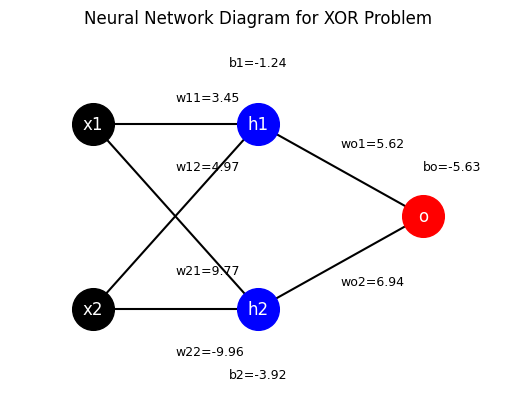

In [4]:
# 신경망 구조 시각화에 대한 추가 수정

# 신경망 구조 시각화
fig, ax = plt.subplots()

# 뉴런 위치 정의
input_positions = [(1, 3), (1, 1)]  # x1, x2 위치
hidden_positions = [(3, 3), (3, 1)]  # h1, h2 위치
output_positions = [(5, 2)]  # 출력층 위치

# 입력층 -> 은닉층 연결
for ipos in input_positions:
    for hpos in hidden_positions:
        ax.plot([ipos[0], hpos[0]], [ipos[1], hpos[1]], 'k-', markersize=0)

# 은닉층 -> 출력층 연결
for hpos in hidden_positions:
    ax.plot([hpos[0], output_positions[0][0]], [hpos[1], output_positions[0][1]], 'k-', markersize=0)

# 뉴런 그리기 (크기와 색상 변경)
ax.plot(*zip(*input_positions), 'ko', markersize=30)  # 입력층
ax.plot(*zip(*hidden_positions), 'bo', markersize=30)  # 은닉층, 파란색
ax.plot(*zip(*output_positions), 'ro', markersize=30)  # 출력층, 빨간색

# 뉴런 레이블 추가 (위치 조정)
for pos, label in zip(input_positions + hidden_positions + output_positions, ['x1', 'x2', 'h1', 'h2', 'o']):
    ax.text(*pos, label, ha='center', va='center', fontsize=12, color='white')

# 가중치와 편향 표시 (위치 조정)
ax.text(x=2, y=3.25,   s=f'w11={w11:.2f}', fontsize=9)
ax.text(x=2, y=1.375,  s=f'w21={w21:.2f}', fontsize=9)
ax.text(x=2, y=2.5,    s=f'w12={w12:.2f}', fontsize=9)
ax.text(x=2, y=0.5,    s=f'w22={w22:.2f}', fontsize=9)
ax.text(x=4, y=2.75,   s=f'wo1={wo1:.2f}', fontsize=9)
ax.text(x=4, y=1.25,   s=f'wo2={wo2:.2f}', fontsize=9)
ax.text(x=5, y=2.5,    s=f'bo={bo:.2f}', fontsize=9)
ax.text(x=3, y=3.625,  s=f'b1={b1:.2f}', fontsize=9, ha='center')
ax.text(x=3, y=0.25,   s=f'b2={b2:.2f}', fontsize=9, ha='center')

# 축과 레이아웃 설정
ax.axis('off')
ax.set_xlim(0, 6)
ax.set_ylim(0, 4)
plt.title("Neural Network Diagram for XOR Problem")
plt.show()
